# DPCRO_SL Guide

In [25]:
import sys
sys.path.insert(0, "..")

from CRO_SL import *
from AbsObjetiveFunc import *
from SubstrateReal import *

The first step will be to define the objetive function that will be optimized, this will be done taking as a base the class AbsObjetiveFunc.
In this case, we will optimize a very simple function, simply adding the squared components of the vector. 

In [26]:

"""
All the following methods will have to be implemented for the algorithm to work properly
with the same inputs, except for the constructor 
"""
class SumSquare(AbsObjetiveFunc):
    """
    This is the constructor of the class, here is where the objetive function can be setted up.
    In this case we will only add the size of the vector as a parameter.
    """
    def __init__(self, size):
        self.size = size
        self.opt = "min" # it can be "max" or "min"
        self.sup_lim = np.full(size, 100) # array where each component indicates the maximum value of the component of the vector
        self.inf_lim = np.full(size, -100) # array where each component indicates the minimum value of the component of the vector

        # we call the constructor of the superclass with the size of the vector
        # and wether we want to maximize or minimize the function 
        super().__init__(self.size, self.opt)
    
    """
    This will be the objetive function, that will recieve a vector and output a number
    """
    def objetive(self, solution):
        return (solution**2).sum()
    
    """
    This will be the function used to generate random vectorsfor the initializatio of the algorithm
    """
    def random_solution(self):
        return (self.sup_lim - self.inf_lim)*np.random.random(self.size) + self.inf_lim
    
    """
    This will be the function that will repair solutions, or in other words, makes a solution
    outside the domain of the function into a valid one.
    If this is not needed simply return "solution"
    """
    def check_bounds(self, solution):
        return np.clip(solution, self.inf_lim, self.sup_lim)

In [27]:
objfunc = SumSquare(30)

Now that we have our objetive function, we can proceed to initialize the optimization algorithm.

First, we configure the hyperparameters of the algorithm in a dictionary, a detailed list of the parameters needed can be found on the README.md file. Here we use a configuration that should work ok in most cases.

In [28]:
params = {
    "popSize": 100,
    "rho": 0.6,
    "Fb": 0.98,
    "Fd": 0.2,
    "Pd": 0.8,
    "k": 3,
    "K": 20,
    "group_subs": True,

    "stop_cond": "neval",
    "time_limit": 4000.0,
    "Ngen": 10000,
    "Neval": 3e5,
    "fit_target": 1000,

    "verbose": True,
    "v_timer": 1,

    "dynamic": True,
    "dyn_method": "success",
    "dyn_metric": "avg",
    "dyn_steps": 10,
    "prob_amp": 0.01
}

Since this algorithm relies on the mixing of different mutation and recombination operators, we will create the list of operators to be used. To create an operator we create an instance of the class SubstrateReal in case we are working with real valued vectors, and SubstrateInt if we are working with discrete valued vectors.

Each operator has it's own parameters that will be specified in the creation of the operator

In [29]:
operators = [
    SubstrateReal("DE/rand/1", {"F": 0.7, "Cr":0.8}),
    SubstrateReal("DE/best/2", {"F": 0.7, "Cr":0.8}),
    SubstrateReal("DE/current-to-best/1", {"F": 0.7, "Cr":0.8}),
    SubstrateReal("DE/current-to-rand/1", {"F": 0.7, "Cr":0.8})
]

Now we simply create an instance of the CRO_SL algorithm with the previous data. 

In [30]:
cro_alg = CRO_SL(objfunc, operators, params)

And we call the optimize function to find a suitable solution. This function will return the best solution along with its value in the objetive function 

In [31]:
solution, obj_value = cro_alg.optimize()

Time Spent 1.0s:
	Generation: 342
	Best fitness: 4.938989232872859e-05
	Evaluations of fitness: 28133
	Substrate probability:
		DE/rand/1:           0.006891
		DE/best/2:           0.185434
		DE/current-to-best/1:0.62224
		DE/current-to-rand/1:0.185434

Time Spent 2.0s:
	Generation: 690
	Best fitness: 9.725780033778712e-08
	Evaluations of fitness: 56870
	Substrate probability:
		DE/rand/1:           0.984887
		DE/best/2:           0.004902
		DE/current-to-best/1:0.005309
		DE/current-to-rand/1:0.004902

Time Spent 3.01s:
	Generation: 1043
	Best fitness: 8.286288337928088e-18
	Evaluations of fitness: 85736
	Substrate probability:
		DE/rand/1:           0.004902
		DE/best/2:           0.058111
		DE/current-to-best/1:0.643152
		DE/current-to-rand/1:0.293835

Time Spent 4.01s:
	Generation: 1400
	Best fitness: 1.042559722621477e-21
	Evaluations of fitness: 115210
	Substrate probability:
		DE/rand/1:           0.975235
		DE/best/2:           0.014713
		DE/current-to-best/1:0.00515
		DE/curre

In [32]:
solution

array([-4.86625653e-28,  1.93159384e-28,  1.05956200e-27, -5.93724315e-28,
       -7.85893578e-28,  2.39959619e-28,  1.02793477e-27,  8.18577865e-28,
       -9.63132825e-28,  1.23791527e-27, -1.38730076e-27, -1.08292644e-27,
       -1.85738308e-27, -2.48440053e-27,  8.17097135e-28,  1.94663495e-29,
        9.05929380e-28,  1.78928909e-27, -9.46236018e-29,  6.01085133e-28,
       -7.49138581e-28,  1.16852134e-27,  4.28688155e-28, -3.24254758e-29,
       -1.47112174e-27, -3.78964079e-30,  8.37403289e-28, -6.67514688e-28,
        4.32650341e-28, -6.38496288e-28])

In [33]:
obj_value

3.0408654502975217e-53

We will also be able to visualize the progress curve and the probability assiciated to each operator in each step, this will be done with the display_report method.

Number of generations: 3644
Real time spent: 10.82359s
CPU time spent: 11.00457s
Number of fitness evaluations: 300012
	Substrate probability:
		DE/rand/1:           0.688372
		DE/best/2:           0.004902
		DE/current-to-best/1:0.260213
		DE/current-to-rand/1:0.046512
Best fitness: 3.0408654502975217e-53


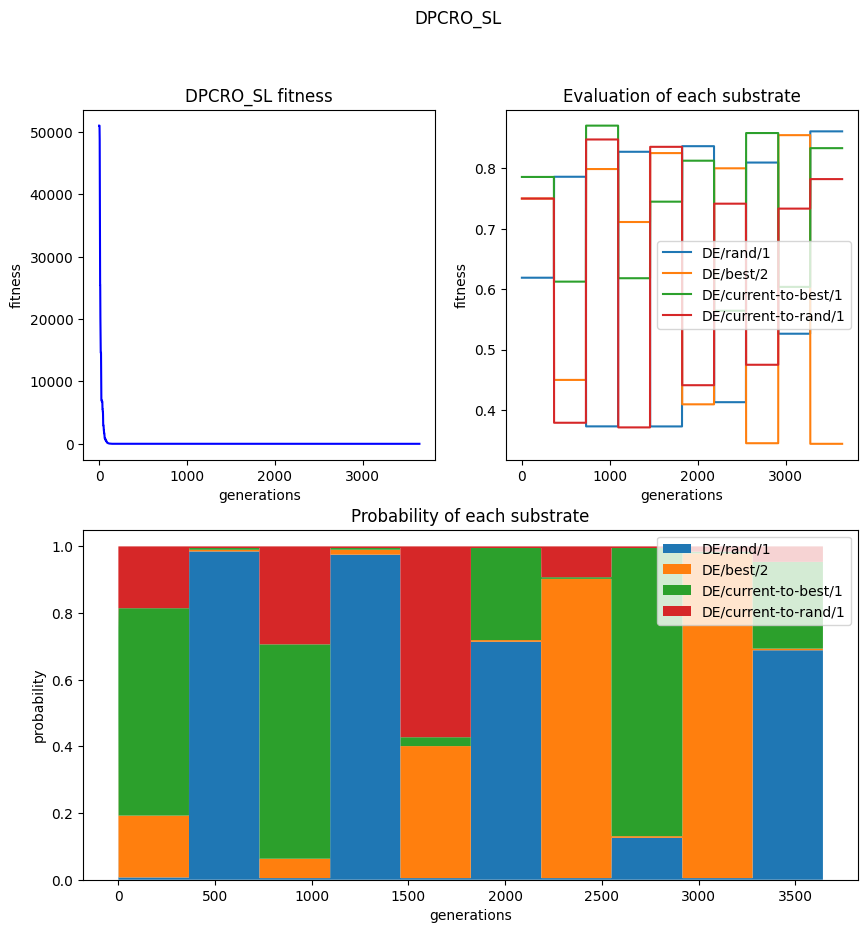

In [34]:
cro_alg.display_report()

If we want to store a solution into a file, we will be able to do so with the save_soluition method. It will save the vector and it's associated objetive function value in a .csv file.

In [35]:
cro_alg.save_solution("example.csv")